In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torch.nn as nn
from torch.optim import SGD

In [2]:
df = pd.read_csv("./fetal_health.csv")
num_samples, num_features = df.drop(["fetal_health"], axis=1).shape
num_classes = len(np.unique(df["fetal_health"]))
print(num_samples, num_features, num_classes)
df.head()

2126 21 3


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
X = df.drop('fetal_health', axis=1).values
y = df['fetal_health'].values -1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
X

array([[1.20e+02, 0.00e+00, 0.00e+00, ..., 1.21e+02, 7.30e+01, 1.00e+00],
       [1.32e+02, 6.00e-03, 0.00e+00, ..., 1.40e+02, 1.20e+01, 0.00e+00],
       [1.33e+02, 3.00e-03, 0.00e+00, ..., 1.38e+02, 1.30e+01, 0.00e+00],
       ...,
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 1.52e+02, 4.00e+00, 1.00e+00],
       [1.40e+02, 1.00e-03, 0.00e+00, ..., 1.51e+02, 4.00e+00, 1.00e+00],
       [1.42e+02, 2.00e-03, 2.00e-03, ..., 1.45e+02, 1.00e+00, 0.00e+00]],
      shape=(2126, 21))

In [5]:
y

array([1., 0., 0., ..., 1., 1., 0.], shape=(2126,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9, random_state=10, stratify=y_train)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((1530, 21), (1530,), (170, 21), (170,), (426, 21), (426,))

In [7]:
x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
X_valid = x_scaler.transform(X_valid)
X_test = x_scaler.transform(X_test)

In [8]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)

X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.int64)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

(torch.Size([1530, 21]),
 torch.Size([1530]),
 torch.Size([170, 21]),
 torch.Size([170]),
 torch.Size([426, 21]),
 torch.Size([426]))

In [9]:
train_set = TensorDataset(X_train, y_train)
valid_set = TensorDataset(X_valid, y_valid)
test_set = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_set, batch_size=10, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=10)
test_loader = DataLoader(test_set, batch_size=10)

In [10]:
model = nn.Sequential(
    nn.Linear(num_features, num_classes),
    # nn.Softmax(dim=1)
    )

loss_fn = nn.CrossEntropyLoss()

optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)

model, loss_fn, optimizer

(Sequential(
   (0): Linear(in_features=21, out_features=3, bias=True)
 ),
 CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     momentum: 0.9
     nesterov: False
     weight_decay: 0
 ))

In [11]:
n_epochs = 100
loss_train_hist, loss_valid_hist = [], []
acc_train_hist, acc_valid_hist = [], []
best_loss_valid = 10000

In [12]:
for epoch in range(n_epochs):

  mean_loss_train, mean_loss_valid = 0, 0
  mean_acc_train, mean_acc_valid = 0, 0

  for x_batch, y_batch in train_loader:

    # model
    y_hat = model(x_batch)    

    # loss
    loss = loss_fn(y_hat, y_batch)

    # gradient
    loss.backward()

    # update
    optimizer.step()
    optimizer.zero_grad()

    mean_loss_train += loss.item() * len(x_batch)
    mean_acc_train += torch.sum(y_hat.argmax(dim=1) == y_batch).item()

  mean_loss_train = mean_loss_train / len(train_set)
  mean_acc_train = mean_acc_train / len(train_set)

  loss_train_hist.append(mean_loss_train)
  acc_train_hist.append(mean_acc_train)


  with torch.no_grad():
    for x_batch, y_batch in valid_loader:
      y_hat = model(x_batch)
      loss = loss_fn(y_hat, y_batch)
      mean_loss_valid += loss.item() * len(x_batch)
      mean_acc_valid += torch.sum(y_hat.argmax(dim=1) == y_batch).item()

    mean_loss_valid = mean_loss_valid / len(valid_set)
    mean_acc_valid = mean_acc_valid / len(valid_set)

    loss_valid_hist.append(mean_loss_valid)
    acc_valid_hist.append(mean_acc_valid)

  print(
  f"Epoch: {epoch}   "
  f"LossTrain: {mean_loss_train:.2}   "
  f"AccTrain: {mean_acc_train:.2}   "
  f"LossValid: {mean_loss_valid:.2}   "
  f"AccValid: {mean_acc_valid:.2}"
  )

  if mean_loss_valid < best_loss_valid:
    torch.save(model, "best-model.pt")
    best_loss_valid = mean_loss_valid
    print("Model Saved!")
    print()

Epoch: 0   LossTrain: 0.94   AccTrain: 0.58   LossValid: 0.7   AccValid: 0.81
Model Saved!

Epoch: 1   LossTrain: 0.56   AccTrain: 0.85   LossValid: 0.52   AccValid: 0.83
Model Saved!

Epoch: 2   LossTrain: 0.45   AccTrain: 0.87   LossValid: 0.44   AccValid: 0.84
Model Saved!

Epoch: 3   LossTrain: 0.39   AccTrain: 0.87   LossValid: 0.4   AccValid: 0.85
Model Saved!

Epoch: 4   LossTrain: 0.36   AccTrain: 0.88   LossValid: 0.37   AccValid: 0.86
Model Saved!

Epoch: 5   LossTrain: 0.34   AccTrain: 0.88   LossValid: 0.36   AccValid: 0.86
Model Saved!

Epoch: 6   LossTrain: 0.33   AccTrain: 0.88   LossValid: 0.34   AccValid: 0.86
Model Saved!

Epoch: 7   LossTrain: 0.32   AccTrain: 0.89   LossValid: 0.33   AccValid: 0.87
Model Saved!

Epoch: 8   LossTrain: 0.31   AccTrain: 0.89   LossValid: 0.33   AccValid: 0.86
Model Saved!

Epoch: 9   LossTrain: 0.3   AccTrain: 0.89   LossValid: 0.32   AccValid: 0.86
Model Saved!

Epoch: 10   LossTrain: 0.3   AccTrain: 0.89   LossValid: 0.31   AccValid:

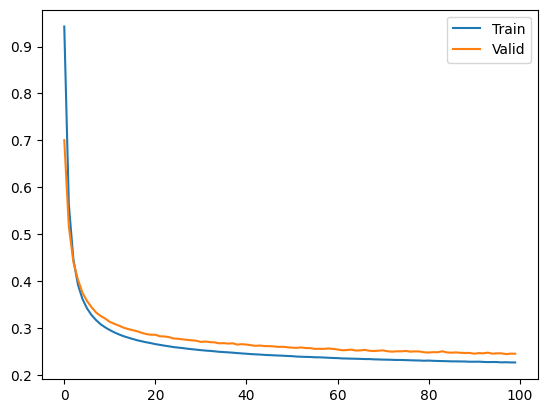

In [13]:
plt.plot(torch.arange(n_epochs), loss_train_hist)
plt.plot(torch.arange(n_epochs), loss_valid_hist)
plt.legend(["Train", "Valid"]);

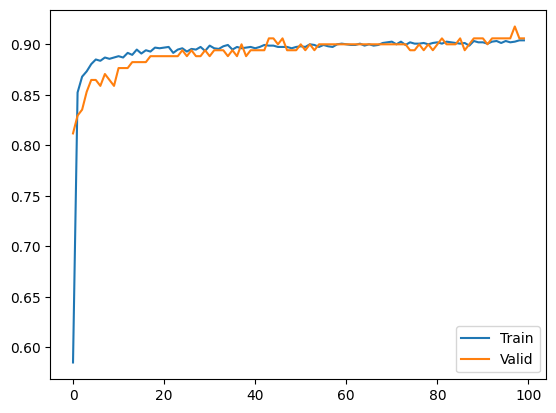

In [14]:
plt.plot(torch.arange(n_epochs), acc_train_hist)
plt.plot(torch.arange(n_epochs), acc_valid_hist)
plt.legend(["Train", "Valid"]);

In [15]:
model = torch.load("best-model.pt", weights_only = False)

mean_acc_test = 0

with torch.no_grad():
  for x_batch, y_batch in test_loader:
    y_hat = model(x_batch)
    mean_acc_test += torch.sum(y_hat.argmax(dim=1) == y_batch).item()
  mean_acc_test = mean_acc_test / len(test_set)

mean_acc_test

0.8732394366197183